# Workshop 5: Calculus and Linear Algebra in Python

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc as scm
import time

## Exercise 1: Python Differentiation

Use the `scipy.misc.derivative()` function with `order=3` to estimate the derivative of the $sin(2x)$, compute the difference relative to the analytical result and plot this difference. Feel free to try changing some of the parameters like `dx` or `order` and see how they impact your result.

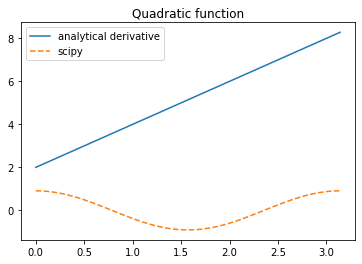

In [44]:
x = np.linspace(0,np.pi,100)
y = x**2+2*x-5
dy_analytical = 2*x+2

def func1(x):
    y = np.sin(2*x)
    return y

ts1 = time.time()
dys = [0.0]*len(x)
for i in range(len(y)):
    dys[i] =  scm.derivative(func1, x[i],args=(), order=3)


plt.plot(x,dy_analytical,label='analytical derivative')
plt.plot(x, dys, '--', label ='scipy')
plt.title('Quadratic function')
plt.legend(loc='upper left')
plt.show()

## Exercise 2: Python Integration

Compute the numerical integral with scipy.

$$\int_{0}^\frac{5\pi}{2}  1 + sin^2(x) dx$$

In [21]:
from scipy.integrate import quad

sin = np.sin

a = 0
b = (5*(np.pi))/2

def y(x):
    return 1 + (sin(2))*x

integral = quad(y,a,b)

print('The integral using scipy quad is', integral[0], 'with a error of',integral[1])

The integral using scipy quad is 35.899000026780655 with a error of 3.9855896390750994e-13


## Exercise 3: Python Integration Part 2

Compute the numerical integral 

$$\int_{-1}^1 \frac{1}{\sqrt{2\pi}} \exp\left(-\frac{x^2}{2}\right) dx$$

using an array of $N$ = 10,100, and 1000 samples, and trapezoid and Simpson methods; compare the precision of these estimates of the integral to what the Scipy quadrature method returns.

In [109]:
from scipy.integrate import simps, trapz, quad
import math

a = -1
b = 1
n = 10

x1=np.arange(a, b, 1/(n))
x2=np.arange(a, b, 1/(10*n))
x3=np.arange(a, b, 1/(100*n))

def func(x):
    return 1/(np.sqrt(2*np.pi))*np.exp(-x**2/2)


dt1=trapz(func(x1),x1)
dt2=trapz(func(x2),x2)
dt3=trapz(func(x3),x3)
ds1=simps(func(x1),x1)
ds2=simps(func(x2),x2)
ds3=simps(func(x3),x3)


integral = quad(func,a,b)

print ('Trapezoid Method (n = 10):', dt1)
print ('Simpsons Method (n = 10):', ds1)
print("")
print ('Trapezoid Method (n = 100):', dt2) 
print ('Simpsons Method (n = 100):', ds2)
print("")
print ('Trapezoid Method (n = 1000):', dt3)
print ('Simpsons Method (n = 1000):', ds3)
print("")

print('The integral using scipy quad is', integral[0], 'with a error of',integral[1])
print('With a higher N value, the value is more inline with the scipy.quad function')


Trapezoid Method (n = 10): 0.6568832743510452
Simpsons Method (n = 10): 0.6572809479197312

Trapezoid Method (n = 100): 0.6802536539011041
Simpsons Method (n = 100): 0.680257686206144

Trapezoid Method (n = 1000): 0.6824473600987899
Simpsons Method (n = 1000): 0.6824474004271902

The integral using scipy quad is 0.682689492137086 with a error of 7.579375928402476e-15
With a higher N value, the value is more inline with the scipy.quad function


## Exercise 4: Matrix Manipulation

a) Invert the matrices $C$ and $D$ in the code cell below. Then multiply $C$ and $D$ on the left by your answer for their respective inverses (calculate $C^{-1}C$ and $D^{-1}D$). Is the product what you expect?

b) Let 
$$b = \begin{pmatrix}
1 \\
2 \\
\end{pmatrix}$$
Use the matrices given to solve for $v$ in the linear equations $Cv = b$ and $Dv = b$ by inverting $C$ and $D$.

In [5]:
# Matrices for Exercise 3
# Do not delete this cell
C = np.matrix([[4, 2],[-1, 5]])
D = np.matrix([[1, 0],[-1, -1]])

In [117]:
print('Matrix C is the following')
print(C)
print('The Inverse of matrix C is ')
Cinv = np.linalg.inv(C)
print(Cinv)

print('Matrix D is the following')
print(D)
print('The Inverse of matrix D is')
Dinv = np.linalg.inv(C)
print(Dinv)

result = np.dot(C,D)
print('The product of Matrices C,D is \n',result)

#####Part B#######
b = np.array([1,2])

X = np.linalg.inv(C).dot(b)
print('The v in the linear equation Cv = b is \n',X)

Y = np.linalg.inv(D).dot(b)
print('The v in the linear equation Dv = b is \n',Y)


Matrix C is the following
[[ 4  2]
 [-1  5]]
The Inverse of matrix C is 
[[ 0.22727273 -0.09090909]
 [ 0.04545455  0.18181818]]
Matrix D is the following
[[ 1  0]
 [-1 -1]]
The Inverse of matrix D is
[[ 0.22727273 -0.09090909]
 [ 0.04545455  0.18181818]]
The product of Matrices C,D is 
 [[ 2 -2]
 [-6 -5]]
The v in the linear equation Cv = b is 
 [[0.04545455 0.40909091]]
The v in the linear equation Dv = b is 
 [[ 1. -3.]]


## Exercise 5: Determination Station

Create your own set of two 3X3 matrices. Calculate the determinate of these matrices and state whether or not they are invertable. Multiply your two matrices together and find the determinant of the result. Is your product invertable?

In [85]:
#Matrcies for Exercise 5
E = np.matrix([[4, 2,6],[-1, 5,6],[-4,-2,3]])
F = np.matrix([[1, 0, 6],[-1, -1, 4], [12,4,5]])


print('The Determent of Matrix E is')
print(np.linalg.det(E))
if np.linalg.det(E) == 0:
    print('The Matrice E is not an invertable')
else:
    print('The Matrice E is an invertable')

print('The Determent of Matrix F is')
print(np.linalg.det(F))
if np.linalg.det(F) == 0:
    print('The Matrice F is not an invertable')
else:
    print('The Matrice F is an invertable')

print('Multplied Matrices = ')
product = np.dot(E,F)
print(product)
determinate_product = np.linalg.det(product)
print('The determiante of the product is',np.linalg.det(product))



if determinate_product == 0:
    print('The product is not an invertable')
else:
    print('The product is an invertable')

The Determent of Matrix E is
198.00000000000017
The Matrice E is a invertable
The Determent of Matrix F is
27.0
The Matrice F is a invertable
Multplied Matrices = 
[[ 74  22  62]
 [ 66  19  44]
 [ 34  14 -17]]
The determiante of the product is 5345.999999999995
The product is a invertable


## Exercise 6: Circuit City

Consider the circuit below:

![a circuit](circuit.jpg)
(Picture of circuit from http://aplusphysics.com)

This circuit has 3 currents $I_1, I_2, I_3$ for which we need to solve using Kirchoff's loop and junction rules. By applying these rules, we can get the following system of equations:

$$ V -I_1R_1 - I_2R_2 - I_1R_4 = 0$$
$$ I_1 = I_2 + I_3$$
$$ I_2R_2 - I_3R_3 = 0$$

Re-arrange these equations to take the form 

$$Av = b$$

where $v$ is a vector of your three unknown currents $(I_1, I_2, I_3)^T$ and $A$ is a $3 \times 3$ matrix of coefficients and $b$ is a vector of 3 constants. Then, use any numerical method you would like to solve for the three constants.

In [142]:
V = 10
R_1 = 20 #ohms
R_2 = 30 #ohms
R_3 = 50 #ohms
R_4 = 20 #ohms


A = np.matrix (([-40, -30, 0 ],[1, -1, 1], [0,30,-50]))
b = np.array([10,0,0])

currents = np.linalg.inv(A).dot(b)
print('The Currents of I_1, I_2, and I_3 are: ')
print(currents)


The Currents of I_1, I_2, and I_3 are: 
[[-0.08695652 -0.2173913  -0.13043478]]


## Exercise 7: Particle in a Box

Solving a quantum mechanics problem - if you haven't taken quantum mechanics, don't worry: I've done the physics portion for you, so the remaining part is just computational.

Suppose a particle is in a square well potential $V$ with infinite barriers at $x \leq 0$ and $x \geq L$. The basic problem, which is exactly solvable, is called the "particle in a box" and has $V = 0$ for $0< x < L$:


Now, we want to go beyond this simple description and try to solve the case where $V(x) = (a/L)x$ for $0 < x < L$ (but still $V = \infty$ for $x \leq 0$ and $x \geq L$). This would be the case if, for example, the particle in the box were charged and a finite electric field were applied.

Because $V = \infty$ outside the box, the wavefunction $\psi(x)$ must be equal to zero for $x\leq 0$ and $x\geq L$ (remember that if $\psi(x)\neq 0$, there is a nonzero probability of finding the particle at $x$). To solve this, we can express $\psi(x)$ for $0 < x < L$ as a linear combination of functions which are equal to zero at $x=0,L$. That way, they respect this condition. Those functions are of the form 

$$\psi(x) = \sum\limits_{n=1}^\infty \psi_n \sin\left({\frac{n\pi x}{L}}\right)$$

The coefficients $\psi_n$ are the unknowns for which we need to solve. Let us think of these unknowns as forming a vector $v = (\psi_1, \psi_2, \dots)^T$. The Schrodinger equation is a matrix equation that looks like 

$$H v = E v$$

where $H$ is a matrix (called the Hamiltonian) and $E$ is a scalar (the energies of $H$). Therefore, this is an eigenvalue problem. What actually is the matrix $H$? For the potential described above, it can be shown that the entries of $H$ take on the form 

$$H_{mn} = \begin{cases}
0 \quad m \neq n\text{ and both are even or odd}\\
 -\frac{8amn}{\pi^2(m^2-n^2)^2} \quad m \neq n\text{ and one is even and one is odd} \\
\frac{a}{2} + \frac{\hbar^2\pi^2n^2}{2ML^2}\quad m = n
\end{cases}$$

Here $M$ is the mass of the particle, $\hbar$ is the reduced Planck's constant (values given below). So now we have a way to calculate all of the elements of $H$, so we have enough to set up the problem. But there is one little thing we need to deal with. The expression for $\psi(x)$ involve summing from $n=1$ to $n=\infty$! That means $v$ has $\infty$ elements and $H$ and is an $\infty \times \infty$ matrix! So we need to make some simplifications. One case we can consider is that if we are only interested in the lowest energies (lowest eigenvalues) of $H$, then we likely do not need to consider the high frequency (high $n$) functions in the expansion of $\psi(x)$. So let us choose to only consider $n=1\dots 10$, so $v$ has 10 elements and $H$ is a $10\times 10 $ matrix.



A physically realistic setup might have that our particle is an electron sitting in optical trap of width $L$. So here are some plausible values to use:

$$M = 9.109\times 10^{-31}\text{ kg}$$
$$a = 1.60218\times 10^{-18}\text{ J}$$
$$L = 5\times 10^{-10}\text{ m}$$
$$\hbar = 1.0545\times 10^{-34}\text{ J}\cdot\text{s}$$

Find the energies (eigenvalues) of the $10 \times 10$ matrix $H$. When you are populating the elements of $H$, beware that in the equations above, $n = 1\dots 10$, but your matrix dimensions start at 0.